# Personalized Medicine: Redefining Cancer Treatment Project
### Objective : Develop an algorithm to classify genetic mutations based on clinical evidence


### Team Member : Arun, Shivani, Thrang

## Business Understanding
In recent years, there has been considerable discussion about the transformative potential of precision medicine, particularly in the realm of genetic testing and its impact on disease treatment.

One key challenge in this domain is the extensive manual effort involved in interpreting genetic information, particularly in the context of cancer. Tumor sequencing often reveals a multitude of genetic mutations, numbering in the thousands. The critical task at hand is to differentiate between mutations that drive tumor growth (known as "drivers") and those that are inconsequential (referred to as "passengers").

Presently, this interpretation of genetic mutations relies heavily on manual review by clinical pathologists. This painstaking process involves scrutinizing each genetic variation and classifying it based on evidence extracted from text-based clinical literature.

Efforts are underway to address this challenge through the development of machine learning algorithms. These algorithms aim to utilize existing knowledge bases as a foundation to automatically classify genetic variations. Notably, Memorial Sloan Kettering Cancer Center (MSKCC) initiated a Kaggle competition centered on this very problem, seeking innovative solutions to automate the classification of genetic mutations.

The model built must be interpretable, as it will help the pathologist to make better decisions. Since one misinterpretations can cost a patient his/her life, the error cost is very high, Hence the model we build must be very accurate.

## Data Overview
*Source* : https://www.kaggle.com/c/msk-redefining-cancer-treatment/

There are nine different classes a genetic mutation can be classified on.

This is not a trivial task since interpreting clinical evidence is very challenging even for human specialists. Therefore, modeling the clinical evidence (text) will be critical for the success of your approach.

Both, training and test, data sets are provided via two different files. One (training/test_variants) provides the information about the genetic mutations, whereas the other (training/test_text) provides the clinical evidence (text) that our human experts used to classify the genetic mutations. Both are linked via the ID field.

#### Feature Description:
1. ID - Simple indexing given to data.
2. Gene - The Gene where the particular genetic mutation is located.
3. Variation - The change in the mutations.
4. Class - The class the genetic mutation belongs to.
5. Text (in training_text file) - The clinical text used to classify the genetic mutation.

In [1]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [2]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
#mounting from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df =pd.read_csv("/content/drive/MyDrive/Dataset/data.csv")  #loading the dataset

## Basic Checks

In [6]:
df.head(15)

,Unnamed: 0,ID,Gene,Variation,Class,Text
0,0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3321 non-null   int64 
 1   ID          3321 non-null   int64 
 2   Gene        3321 non-null   object
 3   Variation   3321 non-null   object
 4   Class       3321 non-null   int64 
 5   Text        3316 non-null   object
dtypes: int64(3), object(3)
memory usage: 155.8+ KB


* From the above information we can see that there are some missing values in the text column

In [8]:
df.describe(include="O")  #describing the column

,Gene,Variation,Text
count,3321,3321,3316
unique,264,2996,1920
top,BRCA1,Truncating Mutations,The PTEN (phosphatase and tensin homolog) phos...
freq,264,93,53


In [9]:
df.columns  #columns of the dataset

Index(['Unnamed: 0', 'ID', 'Gene', 'Variation', 'Class', 'Text'], dtype='object')

In [10]:
df.Class.unique()  #target variable

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
df["Class"].value_counts()  #checking the value counts for class

Class
7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: count, dtype: int64

In [12]:
df["Gene"].value_counts()  #value counts for gene column

Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
         ... 
RYBP        1
MDM2        1
CTLA4       1
ARID1A      1
FAM58A      1
Name: count, Length: 264, dtype: int64

In [13]:
df["Variation"].value_counts()  #value counts for gene column

Variation
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
H1094R                   1
M1250T                   1
PTPRZ1-MET Fusion        1
H1106D                   1
K83E                     1
Name: count, Length: 2996, dtype: int64

In [14]:
df.duplicated().sum()   #checking for duplicates

0

In [15]:
#checking the text columns
df['Text'].iloc[0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

# Exploratory Data Analysis

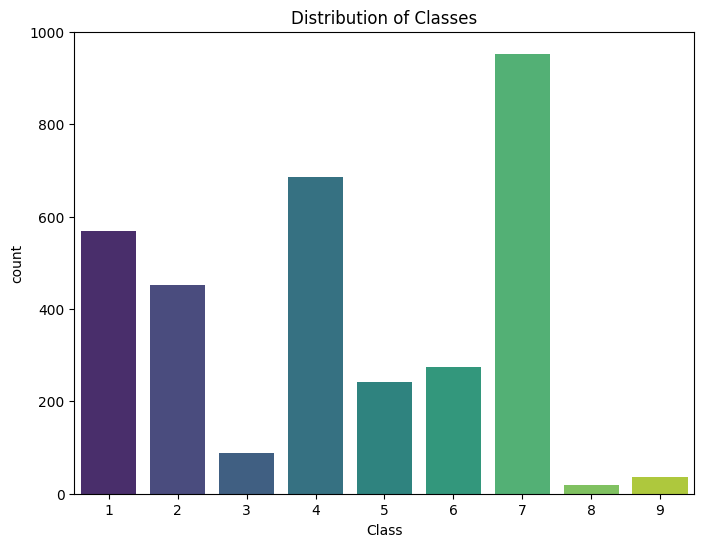

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribution of Classes')
plt.show()

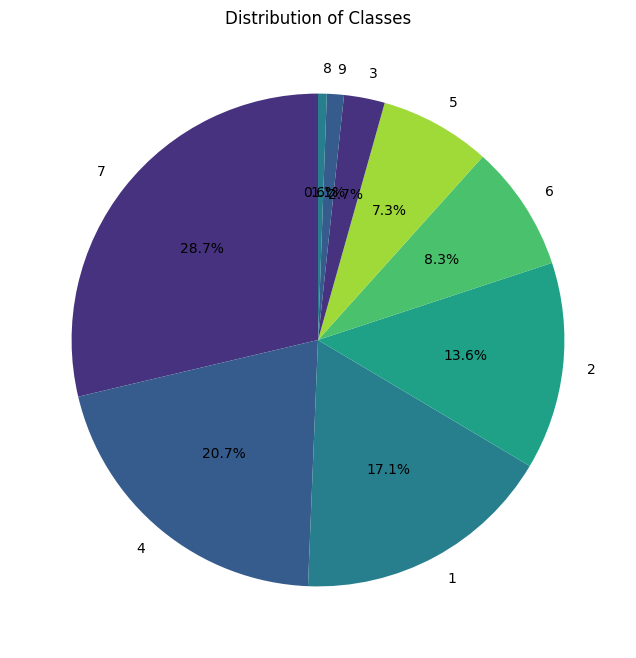

In [17]:
plt.figure(figsize=(8, 8))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Classes')
plt.ylabel('')  # To remove the default 'Class' label
plt.show()

## Data Preprocessing

In [18]:
df.loc[df['Text'].isnull(),'Text']  #The columns with null values

1109    NaN
1277    NaN
1407    NaN
1639    NaN
2755    NaN
Name: Text, dtype: object

In [19]:
df.loc[df['Text'].isnull(),'Text'] = df['Gene'] +' '+df['Variation']  # Fill the null values

In [20]:
df['Text'].iloc[2755]  #checking

'BRAF G596C'

In [21]:
df.drop(['Unnamed: 0','ID'],axis=1,inplace=True)  # Dropping the unnecessary columns

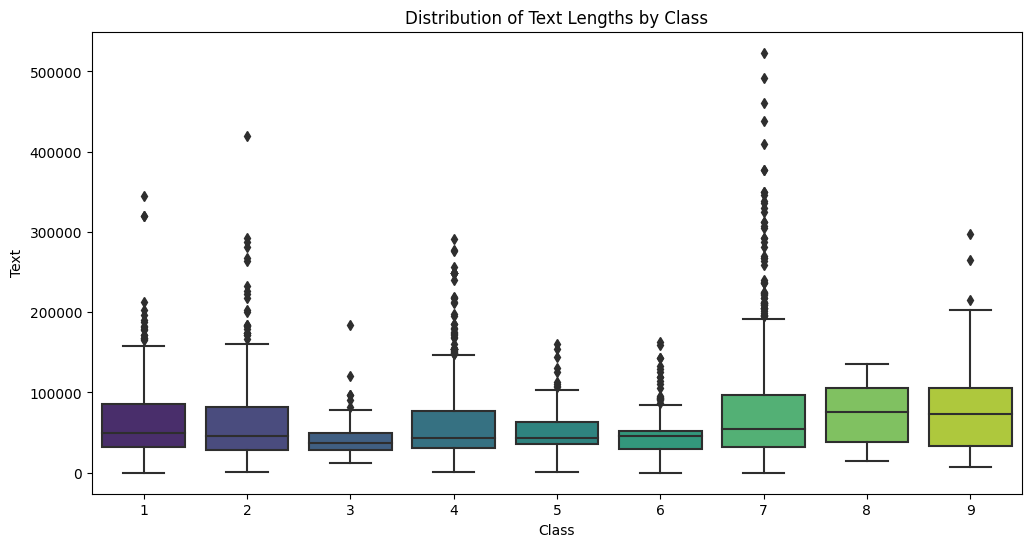

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y=df['Text'].apply(len), data=df, palette='viridis')
plt.title('Distribution of Text Lengths by Class')
plt.show()

In [23]:
# for text data
#Importing Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
import nltk
nltk.download('stopwords')  #downloading english stopwords
nltk.download('punkt')  #downloading word tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
#stopwords
stop_words = set(stopwords.words('english'))

In [26]:
def preprocess_text(text):
    text = str(text)
    text = text.lower() #Converting to lowercase
    text = re.sub(r'\([^)]*\)', '', text)# Remove words within brackets
    text = re.sub('[^a-zA-Z0-9\n]', ' ', text) #replacing special character with space
    text = re.sub(r'\s+', ' ',text) #removal of multiple spaces

    text_tokens = word_tokenize(text)  #tokenize the text

    #removing stopwords
    tw = [word for word in text_tokens if word not in stop_words and not all(char.isdigit() for char in word)]
    text = (" ").join(tw) # join the tokenize words with space
    return text

In [27]:
df['Text'] = df['Text'].apply(preprocess_text)  # applying the function to clean the text

In [28]:
#Replacing the excess space for Gene and variation
df['Gene'] = df['Gene'].str.replace('\s+', '_')
df['Variation'] = df['Variation'].str.replace('\s+', '_')

In [29]:
#Checking if the text have multiple space

def has_multiple_spaces(text):
    # Search for two or more consecutive spaces
    return bool(re.search('\s{2,}', text))


for i in range(len(df)):
    if has_multiple_spaces(df['Text'].iloc[i]):
        print("Text has multiple spaces.")
    else:
        pass



In [30]:
df['Text'].iloc[0] #checking the preprocess data

'cyclin dependent kinases regulate variety fundamental cellular processes cdk10 stands one last orphan cdks activating cyclin identified kinase activity revealed previous work shown cdk10 silencing increases ets2 driven activation mapk pathway confers tamoxifen resistance breast cancer cells precise mechanisms cdk10 modulates ets2 activity generally functions cdk10 remain elusive demonstrate cdk10 cyclin dependent kinase identifying cyclin activating cyclin cyclin orphan cyclin product fam58a whose mutations cause star syndrome human developmental anomaly whose features include toe syndactyly telecanthus anogenital renal malformations show star syndrome associated cyclin mutants unable interact cdk10 cyclin silencing phenocopies cdk10 silencing increasing c raf conferring tamoxifen resistance breast cancer cells cdk10 cyclin phosphorylates ets2 vitro cells positively controls ets2 degradation proteasome ets2 protein levels increased cells derived star patient increase attributable decr

### Splitting into Dependent and Independent Variables

In [31]:
X = df[['Gene', 'Variation', 'Text']]
y = df['Class']



In [32]:
!pip install category_encoders  #category encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [33]:
import pickle
import joblib
from category_encoders import TargetEncoder


# Initialize TargetEncoder
target_encoder = TargetEncoder(cols=['Gene'])  #for Gene column
target_encoder1 = TargetEncoder(cols=['Variation'])  #for variation column

In [34]:
# performing the target encoding values to the 'genes' column
target_encoder.fit(X['Gene'], y)
X['gene_target_encoded'] = target_encoder.transform(X['Gene'], y)


In [35]:
# performing the target encoding values to the 'variation column' column
target_encoder1.fit(X['Variation'], y)
X['variation_target_encoded'] = target_encoder1.transform(X['Variation'], y)

In [36]:
#saving the vectorization method
joblib.dump(target_encoder, 'target_encoder_gene.joblib')
joblib.dump(target_encoder1, 'target_encoder_variation.joblib')

# Save the TargetEncoder using pickle
with open('target_encoder_gene.pkl', 'wb') as file:
    pickle.dump(target_encoder, file)
with open('target_encoder_variation.pkl', 'wb') as file:
    pickle.dump(target_encoder1, file)

In [37]:
X.head()

,Gene,Variation,Text,gene_target_encoded,variation_target_encoded
0,FAM58A,Truncating Mutations,cyclin dependent kinases regulate variety fund...,3.927928,1.152708
1,CBL,W802*,abstract background non small cell lung cancer...,3.988734,4.058036
2,CBL,Q249E,abstract background non small cell lung cancer...,3.988734,4.058036
3,CBL,N454D,recent evidence demonstrated acquired uniparen...,3.988734,4.188145
4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,3.988734,4.318253


In [38]:
#dropping the unnecessary columns and rows
X_data = X.drop(['Gene', 'Variation'], axis = 1)



In [39]:
X_data.head()

,Text,gene_target_encoded,variation_target_encoded
0,cyclin dependent kinases regulate variety fund...,3.927928,1.152708
1,abstract background non small cell lung cancer...,3.988734,4.058036
2,abstract background non small cell lung cancer...,3.988734,4.058036
3,recent evidence demonstrated acquired uniparen...,3.988734,4.188145
4,oncogenic mutations monomeric casitas b lineag...,3.988734,4.318253


In [40]:
#splitting all the columns
X_text = X_data['Text']


#applying vectorizer to text
vectorizer = TfidfVectorizer(min_df = 3)
vectorizer.fit(X_text)
X_text_vectorized = vectorizer.transform(X_text)


In [41]:
X_text_vectorized

<3321x51938 sparse matrix of type '<class 'numpy.float64'>'
	with 4497437 stored elements in Compressed Sparse Row format>

In [42]:
#saving the tfidf vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

pickle.dump(vectorizer.vocabulary_,open("feature.pkl","wb"))
# Save the TF-IDF vectorizer using pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [43]:
train_text_df = pd.DataFrame(X_text_vectorized.toarray(), columns=vectorizer.get_feature_names_out())  #converting to pandas dataframe

In [44]:
#concate the whole dataframe for the X_data
X_tem = X_data[['gene_target_encoded', 'variation_target_encoded']].reset_index(drop = True)

X_df = pd.concat([train_text_df, X_tem], axis=1)


In [45]:
from sklearn.model_selection import train_test_split  #train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_df, y, test_size= 0.25, stratify = y, random_state = 21)

In [46]:
X_train.shape  #shape of training data

(2490, 51940)

In [47]:
X_test.shape  #shape of text data

(831, 51940)

## Building a Machine Learning Model

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, log_loss

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, recall_score, log_loss, f1_score
import numpy as np

clf = DecisionTreeClassifier()

# Define the hyperparameters to tune and their respective values
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Creating a custom scoring function using recall
scoring = {
    'recall': make_scorer(recall_score),
    'log_loss': make_scorer(log_loss),
    'f1_score': make_scorer(f1_score)
}

# Performing Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scoring, refit='recall', cv=5)
grid_search.fit(X_train, y_train)

# Extracting the best model from grid search
best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculating the log loss, recall, and F1-score of the best model on the test set
logloss = log_loss(y_test, best_model.predict_proba(X_test))
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing the log loss, recall, and F1-score of the best model
print(f"Log Loss: {-logloss}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Additional information: Best hyperparameters and their corresponding scores
print("Best Hyperparameters:", grid_search.best_params_)


Log Loss: -1.6915794009332976
Recall: 0.9530685920577617
F1-score: 0.9529919697609772
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [52]:
best_model

DecisionTreeClassifier()

In [56]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred)
con

array([[130,   6,   0,   5,   0,   1,   0,   0,   0],
       [  1, 108,   0,   1,   0,   1,   2,   0,   0],
       [  0,   0,  22,   0,   0,   0,   0,   0,   0],
       [  4,   1,   0, 166,   0,   1,   0,   0,   0],
       [  0,   0,   0,   1,  59,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,  68,   1,   0,   0],
       [  0,   4,   0,   1,   2,   4, 227,   0,   0],
       [  0,   1,   0,   0,   0,   1,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9]])

<Axes: >

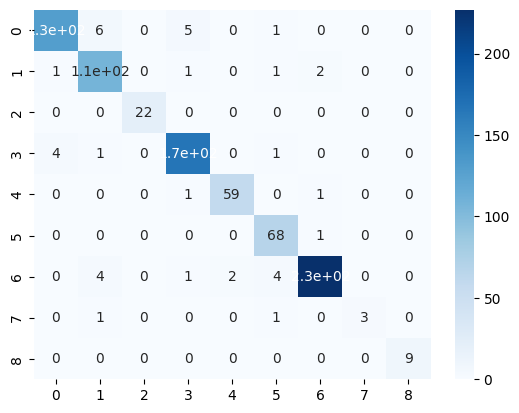

In [57]:
#display the confusion matrix
import seaborn as sns
sns.heatmap(con, annot = True, cmap = 'Blues')

In [50]:
# model = RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)
with open('model_pickle.pkl', 'wb') as f:
  pickle.dump(best_model, f)

In [51]:
joblib.dump(best_model, 'model.joblib')

['model.joblib']

In [53]:
#svc
from sklearn.svm import SVC
SVM_class = svc = SVC(C = 30, gamma = 1,random_state = 42, probability=True)

SVM_class.fit(X_train, y_train)
y_pred_svc = SVM_class.predict(X_test)
y_pred_proba_svc = SVM_class.predict_proba(X_test)
print('Recall score : ', recall_score(y_test, y_pred_svc, average='weighted'))
print('f1 score : ', f1_score(y_test, y_pred_svc, average='weighted'))
print('log loss : ', log_loss(y_test, y_pred_proba_svc))

Recall score :  0.9314079422382672
f1 score :  0.9303068273071349
log loss :  0.24885461173854226


<Axes: >

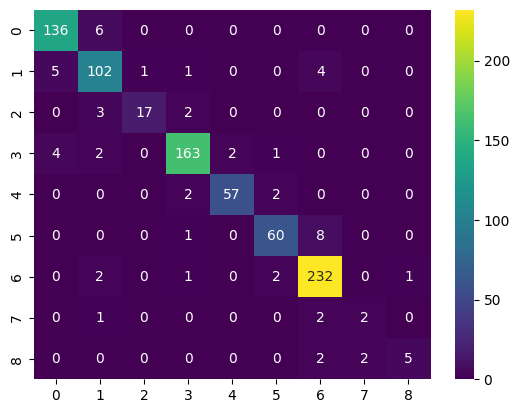

In [59]:
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(confusion_matrix_svc, annot = True, cmap = 'viridis', fmt = 'd')

In [66]:
best_model.predict(X_test)

array([4, 7, 4, 4, 5, 7, 5, 1, 1, 3, 7, 4, 7, 4, 1, 1, 4, 6, 2, 2, 7, 1,
       4, 4, 2, 7, 1, 7, 7, 4, 4, 4, 4, 4, 1, 7, 6, 2, 7, 7, 4, 2, 2, 2,
       2, 2, 4, 2, 5, 1, 1, 5, 4, 2, 4, 5, 7, 7, 7, 2, 2, 4, 7, 1, 7, 1,
       2, 7, 5, 1, 3, 1, 4, 2, 7, 5, 2, 4, 7, 5, 6, 7, 4, 2, 7, 7, 7, 6,
       6, 1, 7, 7, 1, 2, 7, 7, 7, 4, 4, 2, 2, 6, 6, 2, 4, 1, 2, 7, 9, 7,
       6, 2, 2, 5, 4, 2, 4, 7, 5, 4, 7, 4, 7, 1, 6, 2, 7, 7, 2, 6, 5, 4,
       1, 7, 4, 4, 5, 7, 4, 1, 2, 7, 7, 4, 7, 2, 2, 5, 5, 2, 1, 6, 1, 2,
       4, 5, 7, 4, 4, 6, 7, 4, 6, 7, 1, 7, 5, 3, 1, 1, 3, 7, 7, 7, 1, 5,
       7, 1, 3, 2, 7, 1, 1, 4, 1, 4, 2, 2, 7, 7, 4, 7, 6, 2, 7, 7, 2, 1,
       2, 7, 4, 3, 1, 1, 6, 7, 7, 4, 2, 4, 6, 7, 6, 4, 4, 4, 4, 7, 1, 4,
       5, 7, 6, 2, 7, 7, 2, 2, 7, 1, 4, 6, 1, 5, 4, 1, 7, 7, 2, 7, 7, 7,
       1, 2, 7, 4, 1, 4, 4, 3, 7, 1, 7, 6, 2, 1, 7, 2, 7, 4, 1, 2, 4, 1,
       1, 4, 1, 7, 6, 2, 5, 6, 4, 7, 4, 7, 4, 4, 4, 2, 7, 7, 2, 7, 7, 1,
       6, 3, 7, 1, 6, 2, 6, 1, 7, 1, 1, 7, 4, 4, 7,

In [147]:
gene = 'FAM58A'
variation = 'Truncating Mutations'
text = 'cyclin dependent kinases regulate variety fundamental cellular processes cdk10 stands one last orphan cdks activating cyclin identified kinase activity revealed previous work shown cdk10 silencing increases ets2 driven activation mapk pathway confers tamoxifen resistance breast cancer cells precise mechanisms cdk10 modulates ets2 activity generally functions cdk10 remain elusive demonstrate cdk10 cyclin dependent kinase identifying cyclin activating cyclin cyclin orphan cyclin product fam58a whose mutations cause star syndrome human developmental anomaly whose features include toe syndactyly telecanthus anogenital renal malformations show star syndrome associated cyclin mutants unable interact cdk10 cyclin silencing phenocopies cdk10 silencing increasing c raf conferring tamoxifen resistance breast cancer cells cdk10 cyclin phosphorylates ets2 vitro cells positively controls ets2 degradation proteasome ets2 protein levels increased cells derived star patient increase attributable decreased cyclin levels altogether results reveal additional regulatory mechanism ets2 plays key roles cancer development also shed light molecular mechanisms underlying star syndrome cyclin dependent kinases play pivotal role control number fundamental cellular processes human genome contains genes encoding proteins considered members cdk family owing sequence similarity bona fide cdks known activated cyclins although discovered almost ago cdk10 remains one two cdks without identified cyclin partner knowledge gap largely impeded exploration biological functions cdk10 act positive cell cycle regulator cells tumor suppressor others cdk10 interacts ets2 transcription factor inhibits transcriptional activity unknown mechanism cdk10 knockdown derepresses ets2 increases expression c raf protein kinase activates mapk pathway induces resistance mcf7 cells tamoxifen deorphanize cdk10 identifying cyclin product fam58a binding partner mutations gene predict absence truncation cyclin associated star syndrome whose features include toe syndactyly telecanthus anogenital renal malformations heterozygous females however functions cyclin pathogenesis star syndrome remain unknown show recombinant cdk10 cyclin heterodimer active protein kinase phosphorylates ets2 vitro cyclin silencing phenocopies cdk10 silencing increasing c raf phospho erk expression levels inducing tamoxifen resistance estrogen receptor breast cancer cells show cdk10 cyclin positively controls ets2 degradation proteasome phosphorylation two neighboring serines finally detect increased ets2 expression level cells derived star patient demonstrate attributable decreased cyclin expression level observed cells previous sectionnext sectionresultsa yeast two hybrid screen unveiled interaction signal cdk10 mouse protein whose c terminal half presents strong sequence homology human fam58a gene product whose proposed name cyclin thus performed y2h mating assays determine whether human cdk10 interacts human cyclin longest cdk10 isoform expressed bait protein produced strong interaction phenotype full length cyclin detectable phenotype cyclin d1 p21 cdi1 known binding partners cdks cdk1 cdk3 also produced y2h signals cyclin albeit notably weaker observed cdk10 interaction phenotype also observed full length cyclin cdk10 proteins expressed bait prey respectively tested different isoforms cdk10 cyclin originating alternative gene splicing two truncated cyclin proteins corresponding hypothetical products two mutated fam58a genes found star syndrome patients none shorter isoforms produced interaction phenotypes fig new window download pptfig cdk10 cyclin form interaction complex schematic representation different protein isoforms analyzed y2h assays amino acid numbers indicated black boxes indicate internal deletions red box indicates differing amino acid sequence compared cdk10 p1 y2h assay set cdk proteins expressed baits cdk interacting proteins expressed preys peg202 pjg4 empty bait prey plasmids expressing lexa b42 respectively lacz used reporter gene blue yeast indicative y2h interaction phenotype y2h assay different cdk10 cyclin isoforms amino terminal region ets2 known interact cdk10 also assayed western blot analysis myc cdk10 cycm v5 6his expression levels transfected hek293 cells western blot analysis myc cdk10 immunoprecipitates obtained using anti myc antibody inputs correspond g total lysates obtained hek293 cells coexpressing myc cdk10 cycm v5 6his western blot analysis immunoprecipitates obtained using anti cdk10 antibody control goat antibody human breast cancer mcf7 cells input corresponds g mcf7 total cell lysates lower band doublet observed upper panel comigrates exogenously expressed untagged cdk10 thus corresponds endogenous cdk10 upper band doublet corresponds nonspecific signal demonstrated insensitivity either overexpression cdk10 silencing cdk10 another experiment longer gel migration shown fig s1d next examined ability cdk10 cyclin interact expressed human cells tested wild type cdk10 kinase dead mutant bearing d181a amino acid substitution abolishes atp binding expressed cyclin v5 6his myc cdk10 human embryonic kidney cell line expression level cyclin v5 6his significantly increased upon coexpression myc cdk10 lesser extent myc cdk10 increased upon coexpression cyclin v5 6his immunoprecipitated myc cdk10 proteins detected presence cyclin cdk10 immunoprecipitates proteins coexpressed pair wise confirmed observations detecting presence myc cdk10 cyclin v5 6his immunoprecipitates experiments confirmed lack robust interaction cdk10 p2 isoform cyclin detect interaction endogenous proteins performed immunoprecipitations nontransfected mcf7 cells derived human breast cancer cdk10 cyclin antibodies detected cognate endogenous proteins western blotting readily detected cyclin immunoprecipitates obtained cdk10 antibody control antibody results confirm physical interaction cdk10 cyclin human cells unveil hypothesized cdk10 cyclin protein kinase activity produced gst cdk10 strepii cyclin fusion proteins insect cells either individually combination observed gst cdk10 strepii cyclin copurified thus confirming interaction yet another cellular model performed vitro kinase assays purified proteins using histone h1 generic substrate histone h1 phosphorylation detected lysates cells coexpressing gst cdk10 strepii cyclin phosphorylation detected gst cdk10 strepii cyclin expressed alone strepii cyclin coexpressed gst cdk10 next investigated whether ets2 known interact cdk10 phosphorylation substrate cdk10 cyclin detected strong phosphorylation ets2 gst cdk10 strepii cyclin purified heterodimer whereas phosphorylation detected using gst cdk10 alone gst cdk10 strepii cyclin heterodimer fig new window download pptfig cdk10 cyclin dependent protein kinase vitro protein kinase assay histone h1 lysates insect cells expressing different proteins purified glutathione sepharose matrix capture gst cdk10 fusion proteins alone complex str cycm fusion protein purified protein expression levels analyzed western blots kinase activity determined autoradiography histone h1 whose added amounts visualized coomassie staining using purified recombinant 6his ets2 substrate cdk10 silencing shown increase ets2 driven c raf transcription activate mapk pathway investigated whether cyclin also involved regulatory pathway aim highly specific silencing used sirna pools low final concentration cdk10 cyclin sirna pools silenced expression cognate targets interestingly cyclin sirna pool also caused marked decrease cdk10 protein level results shown fig 1d suggest cyclin binding stabilizes cdk10 cyclin silencing induced increase c raf protein mrna levels phosphorylated erk1 erk2 protein levels similarly cdk10 silencing expected effects cdk10 cyclin silencing decreased sensitivity er mcf7 cells tamoxifen similar extent combined silencing genes result higher resistance drug altogether observations demonstrate functional interaction cyclin cdk10 negatively controls ets2 fig new window download pptfig cyclin silencing regulates c raf expression western blot analysis endogenous cdk10 cyclin expression levels mcf7 cells response sirna mediated gene silencing western blot analysis endogenous c raf expression levels mcf7 cells response cdk10 cyclin silencing quantification shown fig s3a quantitative rt pcr analysis cdk10 cyclin c raf mrna levels response cdk10 cyclin silencing p p wished explore mechanism cdk10 cyclin controls ets2 ets2 short lived protein degraded proteasome straightforward hypothesis cdk10 cyclin positively controls ets2 degradation thus examined impact cdk10 cyclin silencing ets2 expression levels silencing cdk10 cyclin caused increase expression levels exogenously expressed flag ets2 protein well endogenous ets2 protein increase attributable increased ets2 mrna levels marginally fluctuated response cdk10 cyclin silencing examined expression levels flag tagged ets2 protein expressed alone combination myc cdk10 cdk10 without cyclin v5 6his flag ets2 readily detected expressed alone lesser extent coexpressed cdk10 however expression level dramatically decreased coexpressed cdk10 alone cdk10 cyclin observations suggest endogenous cyclin levels excess compared cdk10 mcf7 cells show major decrease ets2 levels observed upon cdk10 coexpression involves cdk10 kinase activity treatment cells coexpressing flag ets2 cdk10 cyclin proteasome inhibitor mg132 largely rescued flag ets2 expression levels fig new window download pptfig cdk10 cyclin controls ets2 stability human cancer derived cells western blot analysis endogenous ets2 expression levels mcf7 cells response sirna mediaus worth exploring whether phenotypic similarities feingold star syndrome might explained direct regulation fam58a mycn fam58a located approximately mb centromeric mecp2 xq28 duplications overlapping mecp2 fam58a described associated clinical phenotype females12 deletions overlapping mecp2 fam58a observed date13 although genes fam58a mecp2 implicated brain development fam58a mecp2 genes region known result x linked dominant phenotypes thus deletion genes allele might lethal males females'

In [148]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Load saved models with pickle
with open('target_encoder_gene.pkl', 'rb') as gene_file:
    gene_encoder = pickle.load(gene_file)

with open('target_encoder_variation.pkl', 'rb') as variation_file:
    variation_encoder = pickle.load(variation_file)

with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
    tfidf_model = pickle.load(tfidf_file)

with open('model_pickle.pkl', 'rb') as rf_model_file:
    rf_model = pickle.load(rf_model_file)

In [152]:
gene_encoded = gene_encoder.transform(pd.DataFrame([gene], columns=['Gene']))
variation_encoded = variation_encoder.transform(pd.DataFrame([variation], columns=['Variation']))

# Apply TF-IDF transformation to Text
text_tfidf = tfidf_model.transform([text])

# Combine all encoded features
input_features = pd.concat([pd.DataFrame(text_tfidf.toarray(), columns = tfidf_model.get_feature_names_out()),gene_encoded.rename(columns={'Gene': 'gene_target_encoded'}),
                            variation_encoded.rename(columns = {'Variation': 'variation_target_encoded'})], axis=1).reset_index(drop = True)


In [153]:
type(gene_encoded)

pandas.core.frame.DataFrame

In [154]:
input_features

,0001a,000g,000xg,0012a,0014b,001a,001acd4,001acd8,001bathe,001bimmunophenotypecd34,...,zygote,zygotes,zygotic,zygous,zymed,zymogen,zymosan,zz,gene_target_encoded,variation_target_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.927928,1.152708


In [155]:
best_model.predict(input_features)

array([1])